[![resume](./logo.png)](https://kind-stone-04621511e.1.azurestaticapps.net/)
# Vinho Verde AnalysisüöÄü™ú

## Introduction üßë‚ÄçüöÄ 

Here we are going to understand how wine quality is affected by the fact of changing its chemical components. The goal is to get statistical information that could lead this industry to make better decisions regarding production methods so they could invest more on certain deparments in the production line.üç∑

## Let's load and setup our DataFrames and Environment ü§ñ

## Let's get to know some Vinho Verde chemical propertiesüç∑

> We will use two datasets focused on the quality of wines. Both are related to the white wine and red wine variants of the Portuguese wine "Vinho Verde".   

> The source of these datasets are from the UCI Machine Learning Repository. You can learn more about them [here](https://archive.ics.uci.edu/ml/datasets/wine+quality)üôÉ.

### Input variables

- **üîñFixed acidity** : Most of the acids involved with wine are either fixed or non-volatile.
- **üîñVolatile acidity**: The amount of acetic acid in the wine, where high levels can cause an unpleasant vinegar taste.
- **üîñCitric acid**: Citric acid can add 'freshness' and flavor to wines.
- **üîñResidual sugar**: The amount of sugar left after fermentation stops. Wines with more than 45 grams/litre are considered sweet.
- **üîñChlorides**:The amount of salt in the wine.
- **üîñFree sulfur dioxide**: The free form of SO2 exists in equilibrium between molecular SO2 (as dissolved gas) and bisulfite ion; prevents microbial growth and oxidation of wine.
- **üîñTotal sulfur dioxide**: Number of free and bound forms of S02; Above 50 ppm, SO2 becomes apparent in the nose and flavor of the wine.
- **üîñDensity**: The density change depending on the percentage of alcohol and sugar contained.
- **üîñpH**: Describes how acidic or basic a wine is on a scale of 0 (very acidic) to 14 (very basic); most wines are between 3 and 4 on the pH scale
- **üîñSulphates**: A wine additive that can contribute to sulfur dioxide (S02) levels, which acts as an antimicrobial and antioxidant
- **üîñAlcohol**: The percent alcohol content of the wine

### Variable output
- **üîñQuality**: Output or target variable (based on sensory data, score between 0 and 10). Indicates how good the wine is at this quality standard.

### ¬øWhich libraries do we need?ü§î

Import requiered libraries to processes pandas DataFrames like pandas, numpy, matplotlib.pyplot & seaborn.ü§ì

In [1]:
#Import requiered libraries to processes pandas DataFrames 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting up display options for data precision and float format
pd.set_option('display.precision', 2)
pd.set_option('display.float_format',  '{:,.2f}'.format)

### Load Data üîÉ
> Load the datasets directly from their **URLs** as shown. Alternatively, we could have loaded the data as CSV files, but with URLs, we can have it more directly from the source. **Note**: Delimiter is `;`

In [2]:
url_wine_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_wine_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
red = pd.read_csv(url_wine_red, delimiter=";")
white = pd.read_csv(url_wine_white, delimiter=";")

### Concat DataFrames ü§ù

> We need to add a `category` to each DataFrame to distinguish between red and white wine by the time we concat them. This concatenation is automatically on-axis = 0.

In [3]:
#Adding category to each DataFrame
red['category']='red'
white['category']='white'

#Concatenation on-axis 0
total_wine=pd.concat([white,red],ignore_index=True)
#Let's see what happenedü´£
total_wine.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4935           8.10              0.38         0.28            2.10       0.07   
656            9.00              0.27         0.35            4.90       0.03   
2392           6.40              0.17         0.34            1.50       0.09   
597            7.00              0.29         0.37            4.90       0.03   
4685           7.20              0.26         0.32           10.40       0.06   
3108           7.60              0.35         0.46           14.70       0.05   
6015           7.00              0.69         0.07            2.50       0.09   
2957           6.40              0.12         0.30            1.10       0.03   
2814           6.70              0.19         0.39            1.00       0.03   
1204           5.00              0.33         0.16            1.50       0.05   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
4935                13.00                 30.00     1.00 3.23       0.73   
656                 27.00                 95.00     0.99 3.04       0.40   
2392                42.00                135.00     0.99 3.25       0.49   
597                 26.00                127.00     0.99 3.17       0.44   
4685                23.00                114.00     1.00 3.23       0.49   
3108                33.00                151.00     1.00 3.03       0.53   
6015                15.00                 21.00     1.00 3.38       0.60   
2957                37.00                 94.00     0.99 3.01       0.56   
2814                14.00                 71.00     0.99 3.31       0.38   
1204                10.00                 97.00     0.99 3.48       0.44   

      alcohol  quality category  
4935     9.70        7      red  
656     11.30        6    white  
2392     9.60        7    white  
597     10.80        6    white  
4685    10.50        5    white  
3108    10.30        5    white  
6015    11.30        6      red  
2957    11.70        6    white  
2814    13.00        7    white  
1204    10.70        6    white

### Let's explore and maybe get rid of some duplicates. üîÇ

> First, ¬øHow big is the DataFrame?.   

> Common data types and their statistical description on the dataset. Observe the statistics in detail and identify if there are high differences between each percentile of each feature.

In [4]:
# Size of the dataset
print(f'¬øHow big is the DataFrame? Well is about: {total_wine.shape[0]} rows and {total_wine.shape[1]} columns. ü§ô\n')
#Allocate the right variable type
total_wine['category'] = total_wine['category'].astype('category')
#What type? and How many?
total_wine.info()

¬øHow big is the DataFrame? Well is about: 6497 rows and 13 columns. ü§ô

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   category
dtypes: category(1), float64(11), int6

In [5]:
#Here some measures of central tendency and we can't miss stdüôÉ
total_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       6,497.00          6,497.00     6,497.00        6,497.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            3.00   
75%             7.70              0.40         0.39            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count   6,497.00             6,497.00              6,497.00 6,497.00 6,497.00   
mean        0.06                30.53                115.74     0.99     3.22   
std         0.04                17.75                 56.52     0.00     0.16   
min         0.01                 1.00                  6.00     0.99     2.72   
25%         0.04                17.00                 77.00     0.99     3.11   
50%         0.05                29.00                118.00     0.99     3.21   
75%         0.07                41.00                156.00     1.00     3.32   
max         0.61               289.00                440.00     1.04     4.01   

       sulphates  alcohol  quality  
count   6,497.00 6,497.00 6,497.00  
mean        0.53    10.49     5.82  
std         0.15     1.19     0.87  
min         0.22     8.00     3.00  
25%         0.43     9.50     5.00  
50%         0.51    10.30     6.00  
75%         0.60    11.30     6.00  
max         2.00    14.90     9.00

In [6]:
#Let's get rid of duplicatesüîÇ
total_wine.drop_duplicates(keep='last', inplace=True, ignore_index=True)
print(f'Now we have: {total_wine.shape[0]} rows and {total_wine.shape[1]} columns. ü§ô\n')

Now we have: 5320 rows and 13 columns. ü§ô



In [7]:
#Is quality important?,Yes! Let's see what is the percentage share for each quality category
quality_percentage = total_wine['quality'].value_counts()/total_wine['quality'].value_counts().sum()*100
quality_percentage.sort_index(ascending=True)

3    0.56
4    3.87
5   32.93
6   43.67
7   16.09
8    2.78
9    0.09
Name: quality, dtype: float64

### ¬øWhat I've observed so far? üîçüìî

> `total_wine` is made up of **float64, int64, object/category** which is expected considering we are talking about small quantities. Also, at first glance, `Residual Sugars` have the highest standard deviation of the dataset.

> Removing duplicate values reduced the dimensions of the Dataframe from (6497, 13) to (5320, 13), which help to reduce memory usage and improves processing speed. ü§ô

### Categorization. üéè

> In the previous section, you've seen that `quality` is categorical. Creating other quality column will help us to understand how quality behaves in wines.

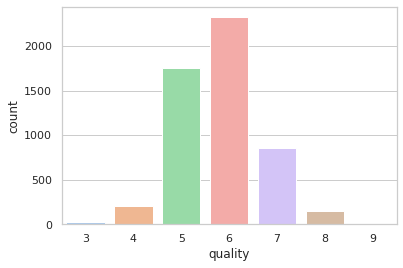

In [8]:
#This represent a frequency plot for each type of wine quality.
sns.set_theme(style="whitegrid")
sns.countplot(data=total_wine, x = 'quality', palette='pastel')
plt.show()

> Indicate wheather quality belogs to `Poor`, `Medium` and `High` to recategorize quality on the dataset and see if we can get new insights.

In [9]:
#This function will allow us to create a new column with categories poor, medium and high
def q_category(num):
    x = ''
    if num <=4:
        x = 'Poor'
        return x
    elif num>4 and num<=6:
        x = 'Medium'
        return x
    else:
        x = 'Hight'
        return x
#looking on the dataset.
total_wine['quality_category'] = total_wine['quality'].apply(q_category)
total_wine.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5315           6.20              0.60         0.08            2.00       0.09   
5316           5.90              0.55         0.10            2.20       0.06   
5317           6.30              0.51         0.13            2.30       0.08   
5318           5.90              0.65         0.12            2.00       0.07   
5319           6.00              0.31         0.47            3.60       0.07   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
5315                32.00                 44.00     0.99 3.45       0.58   
5316                39.00                 51.00     1.00 3.52       0.76   
5317                29.00                 40.00     1.00 3.42       0.75   
5318                32.00                 44.00     1.00 3.57       0.71   
5319                18.00                 42.00     1.00 3.39       0.66   

      alcohol  quality category quality_category  
5315    10.50        5      red           Medium  
5316    11.20        6      red           Medium  
5317    11.00        6      red           Medium  
5318    10.20        5      red           Medium  
5319    11.00        6      red           Medium

In [10]:
#Change datatype for new column quality_category from object to category
total_wine['quality_category'] = total_wine['quality_category'].astype('category') 
total_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  category              5320 non-null   category
 13  quality_category      5320 non-null   category
dtypes: category(2), float64(11), int64(1)
memory usage: 509.

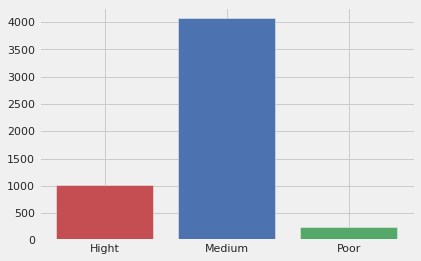

In [11]:
#This is how a freq chart looks like for the quality_ccategory
total_wine['count_cat'] = 1
df_cat = total_wine.copy()
df_cat = total_wine.groupby('quality_category')['count_cat'].count().reset_index()
plt.style.use('fivethirtyeight')
plt.bar(df_cat['quality_category'],df_cat['count_cat'], width=0.8,color=['r','b','g'])
plt.show()

In [12]:
total_wine.drop('count_cat', axis=1, inplace=True)

### Good, but ¬øWhat I've observed so far? üîçüìî

A third categorization facilitates data interpretation so we can know for instance whether 5 o 6 is medium or high and by establishing new boundaries we can come up with other ideas. 

Keep in mind casting our variables to the type of data we want to process. The use of functions facilitates the regrouping of variables based on a new metric.


### Outliers handling üë®‚Äçüíª
Using the boxplots and IQR method, I will be able to detect and maybe processes outliers.

In [13]:
#This func gets the min base on IQR method
def min_olier (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    dis_min  = q1-1.5*iqr
    return round(dis_min,2)

#This func gets the max base on IQR method
def max_olier (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    dis_max = q3+1.5*iqr
    return round(dis_max,2)

#This func answers, ¬øhow many outliers do we have in the upper bound? 
def count_max_out (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    dis_max = q3+1.5*iqr
    x = df > dis_max
    x = x.sum()
    return x

#This func answers, ¬øhow many outliers do we have in the lower bound? 
def count_min_out (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    dis_min  = q1-1.5*iqr
    x = df < dis_min
    x = x.sum()
    return x
total_wine_stats = total_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
#total_wine.drop('count_cat', axis=1, inplace=True)
total_wine_stats.agg([min, min_olier,max,max_olier, count_max_out, count_min_out])
#total_wine.agg([min, min_olier,max,max_olier, count_max_out, count_min_out])
#Here I'm applying all func to the dataset

fixed acidity  volatile acidity  citric acid  residual sugar  \
min                     3.80              0.08         0.00            0.60   
min_olier               4.45             -0.04        -0.00           -6.75   
max                    15.90              1.58         1.66           65.80   
max_olier               9.65              0.68         0.64           16.05   
count_max_out         297.00            279.00       143.00          141.00   
count_min_out           7.00              0.00         0.00            0.00   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
min                 0.01                 1.00                  6.00     0.99   
min_olier          -0.00               -21.50                -44.88     0.99   
max                 0.61               289.00                440.00     1.04   
max_olier           0.11                78.50                272.12     1.00   
count_max_out     237.00                44.00                 10.00     3.00   
count_min_out       0.00                 0.00                  0.00     0.00   

                 pH  sulphates  alcohol  
min            2.72       0.22     8.00  
min_olier      2.78       0.18     6.65  
max            4.01       2.00    14.90  
max_olier      3.66       0.86    14.25  
count_max_out 45.00     163.00     1.00  
count_min_out  4.00       0.00     0.00

In [14]:
#Let's get rid of outliers from the whole dataset the idea is get a bit cleaner data.
#This func replace outliers for each distribition independently by Nan values.
def remove_outliers (df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
#min value for each dristro base on IQR method
    dis_min  = q1-1.5*iqr
#max value for each dristro base on IQR method
    dis_max = q3+1.5*iqr
#Filtering data
    for value in range(df.count()):
        if df[value] <= dis_min or df[value]>= dis_max:
            df[value] =  df[value] * np.nan
        else:
            df[value] = df[value] 
    return df

#Before to apply the func I created a copy so I can separate raw from processesed data. 
total_wine_no_outliers = total_wine.copy()
total_wine_no_outliers = total_wine_no_outliers[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
total_wine_no_outliers.apply(remove_outliers)

#This is just because remove_outliers func didn't work for str so I separeted for a moment.
#Now I added ['quality', 'category','quality_category'] columns again before doing a dropna()
#So, ¬øWhat's the new size?
total_wine_no_outliers[['quality', 'category','quality_category']] = total_wine[['quality', 'category','quality_category']]
total_wine_no_outliers.shape

(5320, 14)

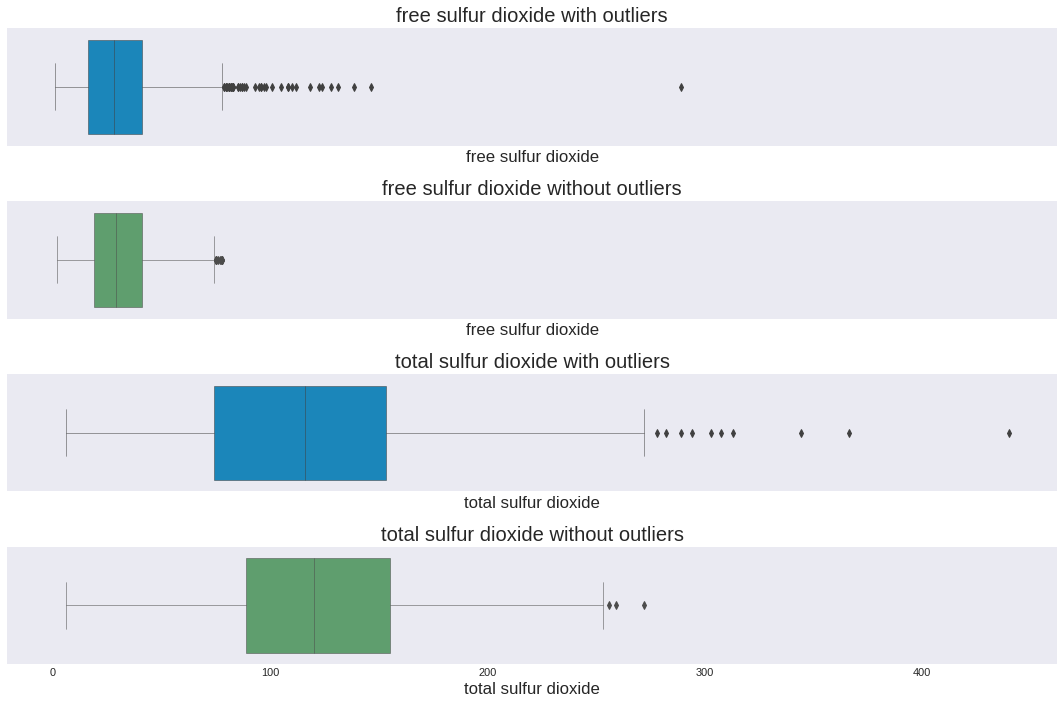

In [15]:
#Here I just want to show you data before and after removing outliers through 
#boxplot method.

total_wine_no_outliers.dropna(inplace=True)
plt.style.use('seaborn-dark')
fig,axes = plt.subplots(4,1, sharex=True, figsize=(15,10))

sns.boxplot(ax=axes[0], x=total_wine['free sulfur dioxide'], linewidth=0.5, orient='h')
axes[0].set_title('free sulfur dioxide with outliers')

sns.boxplot(ax=axes[1], x=total_wine_no_outliers['free sulfur dioxide'], linewidth=0.5, orient='h',color='g')
axes[1].set_title('free sulfur dioxide without outliers')

sns.boxplot(ax=axes[2], x=total_wine['total sulfur dioxide'], linewidth=0.5, orient='h')
axes[2].set_title('total sulfur dioxide with outliers')

sns.boxplot(ax=axes[3], x=total_wine_no_outliers['total sulfur dioxide'], linewidth=0.5, orient='h',color='g')
axes[3].set_title('total sulfur dioxide without outliers')


plt.tight_layout()
plt.show()

1. Samples before removing outliers :(5320, 14)üò¨
2. Samples after removing outliers  :(4218, 14)üôÉ
3. Now we have 1102 less samples than before ü§î
 4. Here some charts to look at the changes.


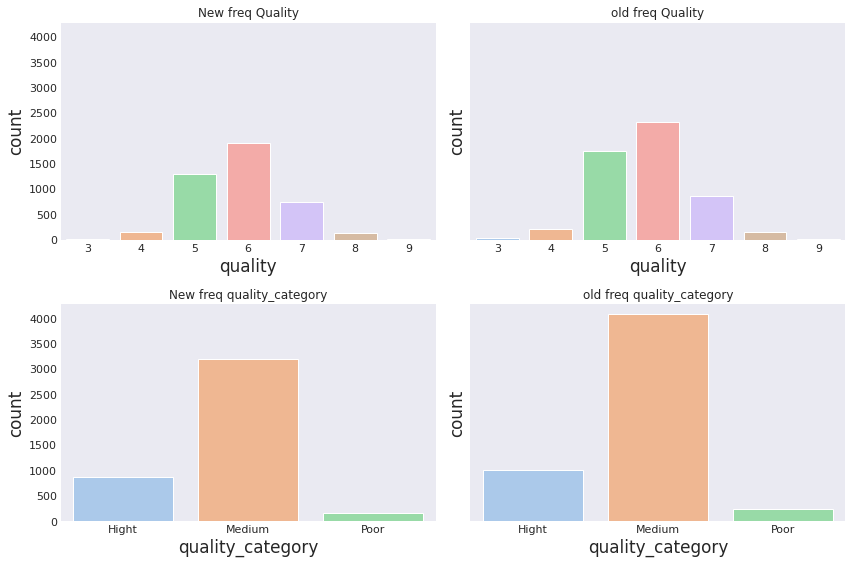

In [16]:
print(f'1. Samples before removing outliers :{total_wine.shape}üò¨\n2. Samples after removing outliers  :{total_wine_no_outliers.shape}üôÉ\n3. Now we have {total_wine.shape[0] - total_wine_no_outliers.shape[0]} less samples than before ü§î\n 4. Here some charts to look at the changes.')

fig,axes = plt.subplots(2,2,figsize=(12,8),sharey=True)
sns.set_theme(style="whitegrid")

sns.countplot(data=total_wine_no_outliers, x = 'quality', palette='pastel',ax=axes[0,0])
axes[0,0].set_title('New freq Quality')

sns.countplot(data=total_wine, x = 'quality', palette='pastel',ax=axes[0,1])
axes[0,1].set_title('old freq Quality')

sns.countplot(data=total_wine_no_outliers, x = 'quality_category', palette='pastel',ax=axes[1,0])
axes[1,0].set_title('New freq quality_category')

sns.countplot(data=total_wine, x = 'quality_category', palette='pastel',ax=axes[1,1])
axes[1,1].set_title('old freq quality_category')

fig.tight_layout()
plt.show()


### ¬øWhat has been done and why? ü§î

> Although perhaps outlier removal wasn't strictly required, some chemical compounds could skew the analysis.

> Compounds such as `'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','sulphates'` have at least in each distribution has over 140 values farther than 3 standard deviations from the mean of each distribution, this statement is made from the IQR method for normal distributions, probably if we process them as non-linear I might change the answer a bit. But as we are processing them as normal then it is necessary. 

### Correlation analysis between variables. ü¶•

Now I know the behavior of the features and the `quality` variable, it is time to learn how do they relate to each other and discover wheather or not they affect quality.

In [17]:
#Correlation Table between all features envolved on the dataset
total_wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00              0.21         0.33   
volatile acidity               0.21              1.00        -0.38   
citric acid                    0.33             -0.38         1.00   
residual sugar                -0.10             -0.16         0.15   
chlorides                      0.29              0.37         0.06   
free sulfur dioxide           -0.28             -0.35         0.13   
total sulfur dioxide          -0.33             -0.40         0.19   
density                        0.48              0.31         0.09   
pH                            -0.27              0.25        -0.34   
sulphates                      0.30              0.23         0.06   
alcohol                       -0.10             -0.07        -0.01   
quality                       -0.08             -0.27         0.10   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                  -0.10       0.29                -0.28   
volatile acidity               -0.16       0.37                -0.35   
citric acid                     0.15       0.06                 0.13   
residual sugar                  1.00      -0.12                 0.40   
chlorides                      -0.12       1.00                -0.19   
free sulfur dioxide             0.40      -0.19                 1.00   
total sulfur dioxide            0.49      -0.27                 0.72   
density                         0.52       0.37                 0.01   
pH                             -0.23       0.03                -0.14   
sulphates                      -0.17       0.41                -0.20   
alcohol                        -0.31      -0.27                -0.17   
quality                        -0.06      -0.20                 0.05   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
fixed acidity                        -0.33     0.48 -0.27       0.30    -0.10   
volatile acidity                     -0.40     0.31  0.25       0.23    -0.07   
citric acid                           0.19     0.09 -0.34       0.06    -0.01   
residual sugar                        0.49     0.52 -0.23      -0.17    -0.31   
chlorides                            -0.27     0.37  0.03       0.41    -0.27   
free sulfur dioxide                   0.72     0.01 -0.14      -0.20    -0.17   
total sulfur dioxide                  1.00     0.01 -0.22      -0.28    -0.25   
density                               0.01     1.00  0.03       0.28    -0.67   
pH                                   -0.22     0.03  1.00       0.17     0.10   
sulphates                            -0.28     0.28  0.17       1.00    -0.02   
alcohol                              -0.25    -0.67  0.10      -0.02     1.00   
quality                              -0.05    -0.33  0.04       0.04     0.47   

                      quality  
fixed acidity           -0.08  
volatile acidity        -0.27  
citric acid              0.10  
residual sugar          -0.06  
chlorides               -0.20  
free sulfur dioxide      0.05  
total sulfur dioxide    -0.05  
density                 -0.33  
pH                       0.04  
sulphates                0.04  
alcohol                  0.47  
quality                  1.00

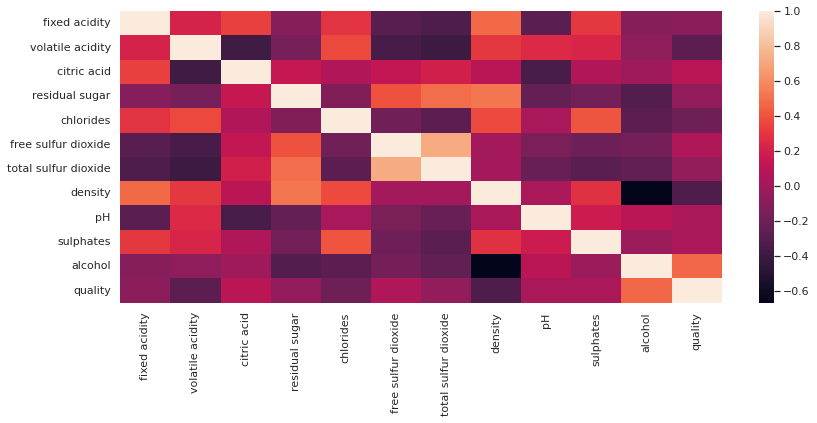

In [18]:
#Here is how a heatmap looks like.
fig = plt.figure(figsize=(12,5))
sns.heatmap(total_wine.corr())
plt.show()

In [19]:
#Correlation between each feature against quality.
wine_corr_quality_a = total_wine.corr()[['quality']].sort_values(by='quality', ascending = False).reset_index().iloc[1:,:].rename(columns={"index": "components"})
wine_corr_quality_b = total_wine_no_outliers.corr()[['quality']].sort_values(by='quality', ascending = False).reset_index().iloc[1:,:].rename(columns={"index": "components"})
wine_corr_quality_a.merge(wine_corr_quality_b, left_on='components', right_on='components', how='inner').rename(columns={"quality_x": "quality_outliers", "quality_y": "quality_without_outliers"})

components  quality_outliers  quality_without_outliers
0                alcohol              0.47                      0.47
1            citric acid              0.10                      0.10
2    free sulfur dioxide              0.05                      0.08
3              sulphates              0.04                      0.04
4                     pH              0.04                      0.05
5   total sulfur dioxide             -0.05                     -0.07
6         residual sugar             -0.06                     -0.05
7          fixed acidity             -0.08                     -0.10
8              chlorides             -0.20                     -0.28
9       volatile acidity             -0.27                     -0.21
10               density             -0.33                     -0.35

### So, ¬øWhat's going on with the correlation?üïµÔ∏è‚Äç‚ôÇÔ∏è

Well, here all variable with a positive correlation:

```
1                alcohol
2            citric acid
3    free sulfur dioxide
4              sulphates
5                     pH
Name: components, dtype: object
```
and, here all variable with a negative correlation:
```
6     total sulfur dioxide
7           residual sugar
8            fixed acidity
9                chlorides
10        volatile acidity
11                 density
Name: components, dtype: object
```


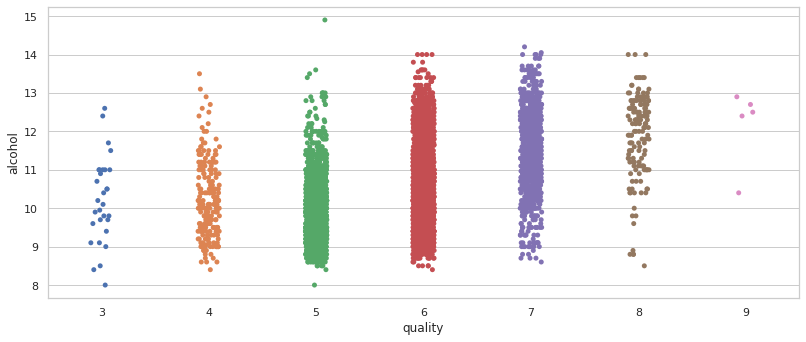

In [20]:
#Definitely the highest correlation is given by the alchol but is not too much. 

fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(12,5))
sns.stripplot(data=total_wine, x='quality',y='alcohol')
plt.show()


- **¬øAre there variables correlated with quality that are strongly correlated with each other?** ü§î

    - Most of the variables correlated with the  quality variable have a factor œÅ ‚âÖ 0, which means there isn't really a correlation but instead of a strong correlation there is a weak correlation by alcohol with œÅ ‚âÖ 0.47. and is the most representative one.

- **¬øWhy would it be usefull?** ü§î
    - Well, Now I know there's no major findings presented on correlation, it would be important investigate in depth the units of each variable to identify which are more controllable in the winemaking process.

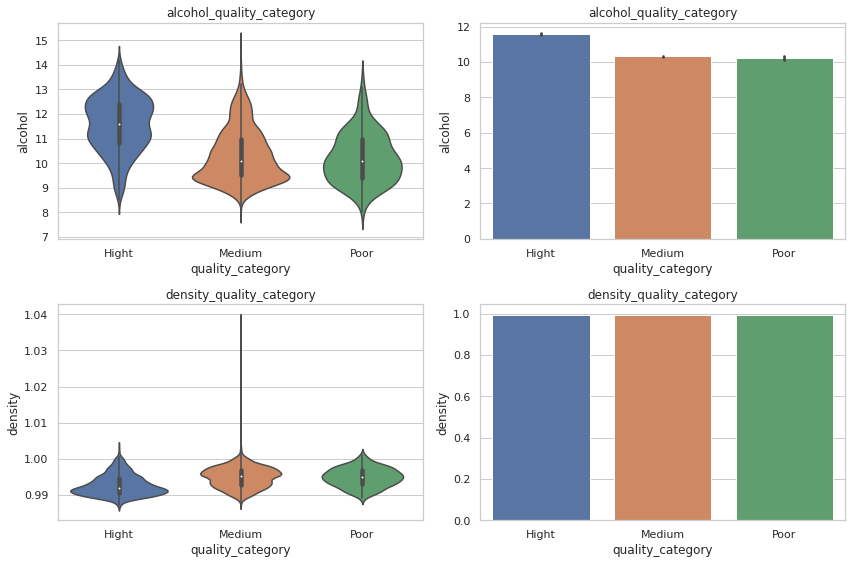

In [21]:
#Now I have seen alcohol an density correlation against quality 
#I would like to take a look on its distro base on quality_category

fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.violinplot(ax =axes[0,0],data=total_wine,x='quality_category', y='alcohol')
axes[0,0].set_title('alcohol_quality_category')

sns.barplot(ax =axes[0,1],data=total_wine,x='quality_category', y='alcohol')
axes[0,1].set_title('alcohol_quality_category')

sns.violinplot(ax =axes[1,0],data=total_wine,x='quality_category', y='density')
axes[1,0].set_title('density_quality_category')

sns.barplot(ax =axes[1,1],data=total_wine,x='quality_category', y='density')
axes[1,1].set_title('density_quality_category')

fig.tight_layout()
plt.show()

### As conclusions of this EDA üß©

- **¬øWhat are the variables that could affect the quality of the wine?**

    - Alcohol is possibly the most related to quality, unlike density which, despite having a negative and weak correlation, cannot really be related to quality since this property is not independent of the other variables. 

- **¬øIs it necessary to increase or decrease the quantity of these variables to increase quality?**

    - No, in fact it is possible to find low quality wines with high amounts of alcohol and in the other way aroud. The variability in the production process is high so it is nessary  investigate its chemical componets in depth.

- **¬øWhat is the variable that could most affect the quality of the wine?**
    - By far, alcohol.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9967b59b-f643-46c2-bfe8-889a09ee313c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>